In [1]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree

## Reading data 

In [4]:
df = pd.read_csv('drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


## Pre-processing

In [14]:
# Remove the column containing the target name since it doesn't contain numeric values

X = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']].values
X[0:5]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043]], dtype=object)

In [15]:
# Sklearn Decision Trees does not handle categorical variables. Convert these features to numerical values using pandas.get_dummies()
# making it to dummies

from sklearn import preprocessing 
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['F', 'M'])
X[:,1] = le_sex.transform(X[:,1])

le_bp = preprocessing.LabelEncoder()
le_bp.fit(['LOW', 'NORMAL', 'HIGH'])
X[:,2] = le_bp.transform(X[:,2])

le_chol = preprocessing.LabelEncoder()
le_chol.fit(['NORMAL', 'HIGH'])
X[:,3] = le_chol.transform(X[:,3])



In [21]:
print(X[:,1]) # sex
print(X[:,2]) # bp
print(X[:,3]) # chol

[0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 0 1 0 0 1 0 1 1 0 1 1 1
 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 1 0 0 0
 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1
 0 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 1 1 0 0
 0 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0
 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0]
[0 1 1 2 1 2 2 1 2 1 1 0 1 1 2 0 1 0 1 0 1 2 1 1 1 0 0 2 1 1 2 0 1 0 2 2 0
 1 2 2 2 0 2 2 2 2 0 1 2 1 0 2 1 0 0 1 0 0 2 0 1 0 1 1 0 2 0 2 2 0 0 2 2 2
 0 1 0 0 0 1 0 2 1 0 1 0 2 1 0 2 2 0 0 1 1 1 1 0 0 0 0 0 1 2 0 1 2 1 0 2 0
 2 1 1 2 0 2 2 0 0 2 0 2 2 0 0 0 2 1 2 2 1 1 2 0 1 0 0 0 2 0 1 0 0 0 2 1 0
 1 1 0 0 2 1 1 1 0 1 1 1 2 0 2 0 0 1 1 2 1 0 2 1 2 1 0 0 0 2 2 2 0 2 1 0 0
 2 0 0 0 0 0 0 1 1 0 1 1 2 2 1]
[0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1
 1 1 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 0 0 1
 1 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 0 1

In [22]:
X

array([[23, 0, 0, 0, 25.355],
       [47, 1, 1, 0, 13.093],
       [47, 1, 1, 0, 10.114],
       [28, 0, 2, 0, 7.798],
       [61, 0, 1, 0, 18.043],
       [22, 0, 2, 0, 8.607],
       [49, 0, 2, 0, 16.275],
       [41, 1, 1, 0, 11.037],
       [60, 1, 2, 0, 15.171],
       [43, 1, 1, 1, 19.368],
       [47, 0, 1, 0, 11.767],
       [34, 0, 0, 1, 19.199],
       [43, 1, 1, 0, 15.376],
       [74, 0, 1, 0, 20.942],
       [50, 0, 2, 0, 12.703],
       [16, 0, 0, 1, 15.516],
       [69, 1, 1, 1, 11.455],
       [43, 1, 0, 0, 13.972],
       [23, 1, 1, 0, 7.298],
       [32, 0, 0, 1, 25.974],
       [57, 1, 1, 1, 19.128],
       [63, 1, 2, 0, 25.917],
       [47, 1, 1, 1, 30.568],
       [48, 0, 1, 0, 15.036],
       [33, 0, 1, 0, 33.486],
       [28, 0, 0, 1, 18.809],
       [31, 1, 0, 0, 30.366],
       [49, 0, 2, 1, 9.381],
       [39, 0, 1, 1, 22.697],
       [45, 1, 1, 0, 17.951],
       [18, 0, 2, 1, 8.75],
       [74, 1, 0, 0, 9.567],
       [49, 1, 1, 1, 11.014],
       [65, 0, 0,

In [23]:
# fill the target variable

y = df['Drug']
y[0:5]

0    drugY
1    drugC
2    drugC
3    drugX
4    drugY
Name: Drug, dtype: object

## Setting up the Decision Tree

In [26]:
from sklearn.model_selection import train_test_split

X_trainset, X_testset, y_trainset, y_testset = train_test_split(X, y, test_size=0.3, random_state=3)

In [29]:
print(X_trainset)
print(f'\nX_trainset size is {X_trainset.shape}')

[[26 0 0 1 19.161]
 [41 0 2 1 22.905]
 [28 0 2 0 19.675]
 [19 0 0 0 13.313]
 [50 1 2 1 15.79]
 [24 1 2 0 25.786]
 [72 1 1 0 16.31]
 [74 0 1 0 20.942]
 [37 0 1 1 12.006]
 [31 1 0 1 17.069]
 [22 0 2 0 8.607]
 [20 0 2 1 9.281]
 [28 0 1 0 13.127]
 [59 0 2 0 13.884]
 [15 1 0 1 17.206]
 [51 0 1 1 23.003]
 [45 1 1 1 10.017]
 [33 0 1 0 33.486]
 [39 1 0 0 9.664]
 [29 0 0 0 29.45]
 [60 1 2 0 15.171]
 [24 0 0 1 18.457]
 [49 0 2 1 9.381]
 [37 1 1 1 8.968]
 [32 0 0 1 10.292]
 [21 0 0 1 28.632]
 [23 1 2 0 12.26]
 [40 1 0 0 27.826]
 [38 1 1 0 18.295]
 [47 1 1 1 30.568]
 [22 0 0 1 22.818]
 [47 1 0 0 10.403]
 [30 0 2 0 10.443]
 [69 1 1 0 15.478]
 [42 0 0 0 21.036]
 [45 1 1 1 8.37]
 [49 1 0 1 6.269]
 [72 1 1 0 6.769]
 [74 1 1 1 11.939]
 [66 0 2 1 8.107]
 [46 1 2 1 7.285]
 [68 0 2 1 27.05]
 [58 0 0 0 19.416]
 [19 0 0 1 25.969]
 [20 1 0 1 35.639]
 [69 1 1 1 11.455]
 [32 0 0 1 25.974]
 [72 1 0 1 9.677]
 [50 0 2 1 12.295]
 [54 1 2 0 24.658]
 [36 0 0 0 11.198]
 [64 0 1 1 25.741]
 [35 1 1 1 9.17]
 [47 0 1 0 1

In [30]:
print(y_trainset)
print(f'\ny_trainset size is {y_trainset.shape}')

77     drugY
73     drugY
71     drugY
78     drugA
42     drugY
       ...  
0      drugY
184    drugY
131    drugY
152    drugX
106    drugX
Name: Drug, Length: 140, dtype: object

y_trainset size is (140,)


In [31]:
print('Shape of X test set {}'.format(X_testset.shape),'&',' Size of Y test set {}'.format(y_testset.shape))

Shape of X test set (60, 5) &  Size of Y test set (60,)


## Modeling

In [32]:
drugTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
drugTree

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [34]:
drugTree.fit(X_trainset, y_trainset)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

## Prediction

In [35]:
predTree = drugTree.predict(X_testset)

In [36]:
print(predTree[0:5])
print(y_testset[0:5])

['drugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     drugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


## Evaluation

In [37]:
from sklearn import metrics
import matplotlib.pyplot as plt

print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.9833333333333333


In [42]:
#!conda install -c conda-forge pydotplus -y
#!conda install -c conda-forge python-graphviz -y

Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda




Solving environment: ...working... done

# All requested packages already installed.

Retrieving notices: ...working... done




==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c defaults conda




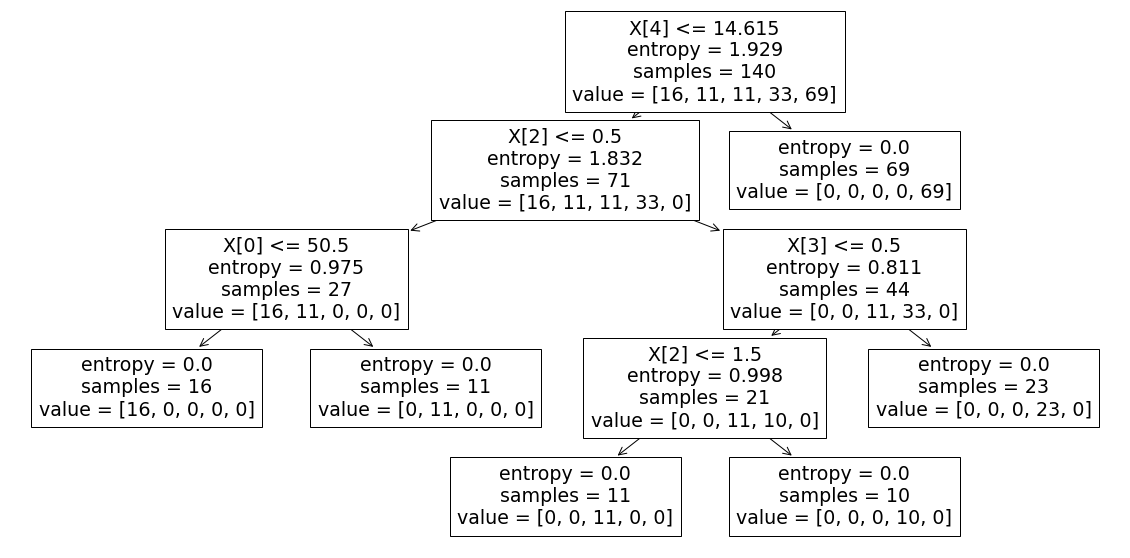

In [45]:
fig, axes = plt.subplots(figsize=(20, 10))
tree.plot_tree(drugTree, ax=axes)
plt.show()